# Preliminary Time Series Analysis: Microbiome data
    For all designations/subclassifications of species in the microbiome, do the following
    time series tests.
    
    1. For each time point, find classifications where its z-score deviates from all other time points
    2. Treat each time point as the last time point, for 0...t, find classifications where its z-scores deviates
        from all other points
    3. Treat each time point as the last time point, find linear trends
    4. Do changepoint analysis based on differences between population and sliding window.
    5. Autocorrelation

In [1]:
import sys


# User Libraries
import tanner.stats.timeseries as ts
import tanner.stats.helpers as shelp
import tanner.analysis.microbiome as mb
import tanner.visual.timeseries as vts

# Python Libraries
import pandas as pd
import os 
import seaborn as sns

# Ipython Configuration
%pylab inline
%load_ext autoreload
%autoreload 2

# Data and analysis paths
microbiome_path = "/mounts/tscc/projects/Li-Fraumeni/data/family3/microbiome/14009b/aggregated/"
analysis_path = "/mounts/tscc/projects/Li-Fraumeni/analysis/microbiome"

Populating the interactive namespace from numpy and matplotlib


In [358]:
!ls -lh $microbiome_path

total 12M
-rw-r--r--. 1 kbhutani schork  20K Sep 11 10:12 Bacteria-class-abundance.txt
-rw-r--r--. 1 kbhutani schork  90K Sep 11 10:12 Bacteria-family-abundance.txt
-rw-r--r--. 1 kbhutani schork 299K Sep 11 10:12 Bacteria-genus-abundance.txt
-rw-r--r--. 1 kbhutani schork  41K Sep 11 10:13 Bacteria-order-abundance.txt
-rw-r--r--. 1 kbhutani schork 9.5K Sep 11 10:13 Bacteria-phylum-abundance.txt
-rw-r--r--. 1 kbhutani schork 1.2M Sep 11 10:13 Bacteria-species-abundance.txt
-rw-r--r--. 1 kbhutani schork 2.5M Sep 11 10:13 Bacteria-toprank-abundance.txt
-rw-r--r--. 1 kbhutani schork 660K Sep 11 10:15 cog-ann.txt
-rw-r--r--. 1 kbhutani schork 4.7K Sep 11 10:15 cog-class-ann.txt
-rw-r--r--. 1 kbhutani schork 8.5K Sep 11 10:14 Eukaryota-class-abundance.txt
-rw-r--r--. 1 kbhutani schork  27K Sep 11 10:14 Eukaryota-family-abundance.txt
-rw-r--r--. 1 kbhutani schork  36K Sep 11 10:14 Eukaryota-genus-abundance.txt
-rw-r--r--. 1 kbhutani schork  18K Sep 11 10:14 Eukaryota-order-abundance.txt
-rw-r-

In [357]:
!cat $microbiome_path/../README.txt

List of files and directories in this folder

README.txt: 	this file

Samples.txt: 	a text file with a list of sample names
        For projects that we received samples by batches, and we processed and annotated these samples
        by batches, there will be additional files <Sample-batch-number.txt>.

Sample directories: 	each sample directory has a list of files:
        taxonomy-data: 		taxonomy binning results for all genomes in HLI's reference genome database	
        superkingdom-reads-count.txt:	number of reads mapped to different superkingdoms

        assembles.fna:		assemble sequences in FASTA format
        assembles-cov:		average coverage of assembles
        species-bins-assembles:	assembles binned at species level
        ORF.faa:		ORF sequences predicted from assembles in FASTA format
        ORF-cov:		average coverage of ORFs
        species-bins-ORFs:	ORFs binned at species level
        ORF-single.faa:		ORF sequences predicted from un-assembled reads in FASTA format

In [ ]:
date = "09142015"
analysis_path = os.path.join(analysis_path, date)
if not os.path.exists(analysis_path): os.makedirs(analysis_path)
sns.set_context("talk", font_scale=1.2)
sns.set_style("whitegrid")

###  For the last time point, see if its zscore deviates from previous.

In [337]:
sample_fn = microbiome_path+'tigrfam-subrole-ann.txt'
data_df = mb.load_aggregated(sample_fn)

In [356]:
data_df

Sub_role   Aromatic amino acid family        Aspartate family  \
Main_role     Amino acid biosynthesis Amino acid biosynthesis   
2014-07-12                   0.006816                0.010298   
2014-08-08                   0.006587                0.010128   
2014-08-20                   0.006404                0.010065   
2014-09-16                   0.007184                0.010496   
2014-09-24                   0.006768                0.010405   
2014-10-03                   0.006311                0.010067   
2014-10-28                   0.006282                0.009859   
2014-11-13                   0.006283                0.009799   
2014-11-24                   0.006421                0.010116   
2014-12-13                   0.006231                0.009935   
2014-12-18                   0.006238                0.010104   

Sub_role          Glutamate family        Histidine family  \
Main_role  Amino acid biosynthesis Amino acid biosynthesis   
2014-07-12                0.008592                0.004905   
2014-08-08                0.008353                0.004892   
2014-08-20                0.008027                0.004632   
2014-09-16                0.008834                0.004800   
2014-09-24                0.008338                0.004967   
2014-10-03                0.008165                0.004540   
2014-10-28                0.008027                0.004550   
2014-11-13                0.008358                0.004867   
2014-11-24                0.008065                0.004701   
2014-12-13                0.007865                0.004386   
2014-12-18                0.008115                0.004770   

Sub_role                     Other         Pyruvate family  \
Main_role  Amino acid biosynthesis Amino acid biosynthesis   
2014-07-12                0.000061                0.006468   
2014-08-08                0.000037                0.006585   
2014-08-20                0.000036                0.006253   
2014-09-16                0.000062                0.006744   
2014-09-24                0.000050                0.006967   
2014-10-03                0.000064                0.006013   
2014-10-28                0.000075                0.006188   
2014-11-13                0.000029                0.006839   
2014-11-24                0.000051                0.006342   
2014-12-13                0.000067                0.005988   
2014-12-18                0.000061                0.006220   

Sub_role             Serine family  \
Main_role  Amino acid biosynthesis   
2014-07-12                0.005409   
2014-08-08                0.005643   
2014-08-20                0.005362   
2014-09-16                0.005483   
2014-09-24                0.005648   
2014-10-03                0.005545   
2014-10-28                0.005410   
2014-11-13                0.005514   
2014-11-24                0.005554   
2014-12-13                0.005229   
2014-12-18                0.005252   

Sub_role                                                       Biotin  \
Main_role  Biosynthesis of cofactors, prosthetic groups, and carriers   
2014-07-12                                           0.001750           
2014-08-08                                           0.002151           
2014-08-20                                           0.002383           
2014-09-16                                           0.001749           
2014-09-24                                           0.002099           
2014-10-03                                           0.001947           
2014-10-28                                           0.001938           
2014-11-13                                           0.002494           
2014-11-24                                           0.001898           
2014-12-13                                           0.001814           
2014-12-18                                           0.001896           

Sub_role                           Chlorophyll and bacteriochlorphyll  \
Main_role  Biosynthesi

In [ ]:
sample ='2014-12-18'
outliers = ts.outliers(data_df, z_threshold=1.67,
                       sample = sample)

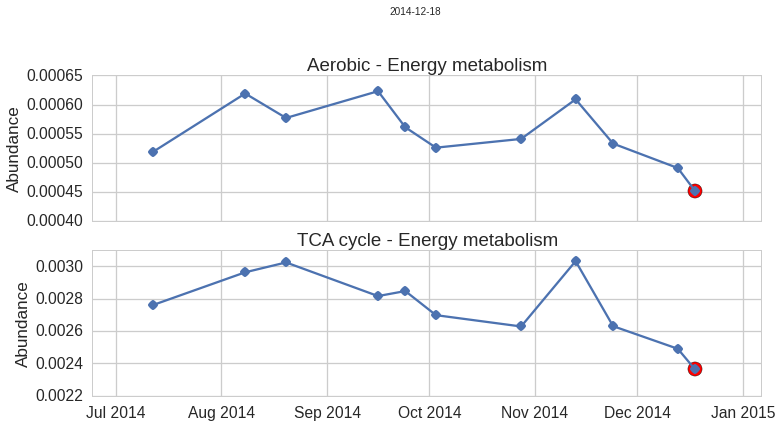

In [302]:
figs = vts.default(data_df[outliers[sample]], main_title=sample, marksample=sample)

### Using the entire population, look at deviations for any time point

In [303]:
outliers = ts.outliers(data_df, z_threshold=1.67)

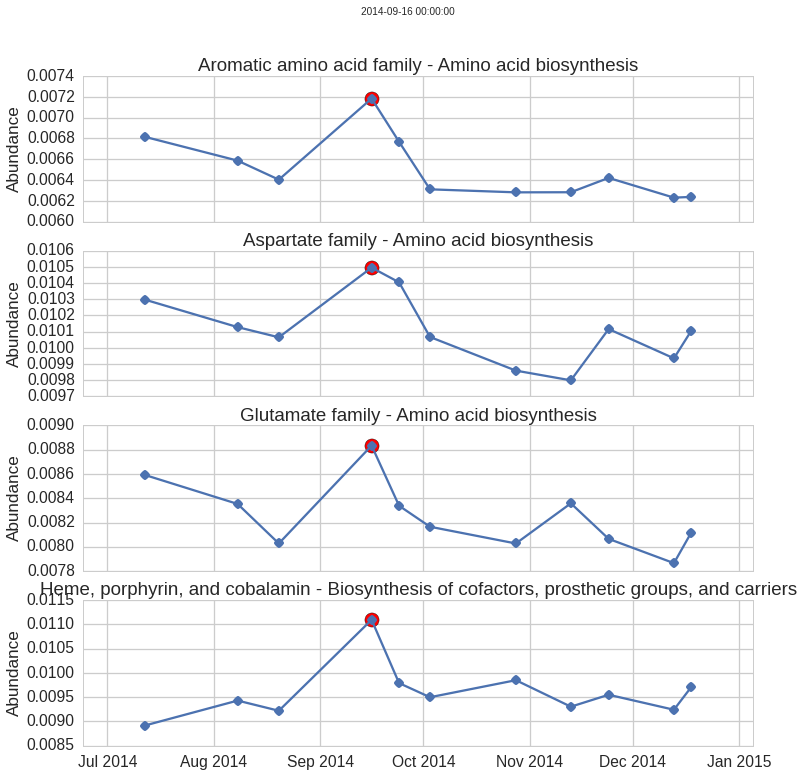

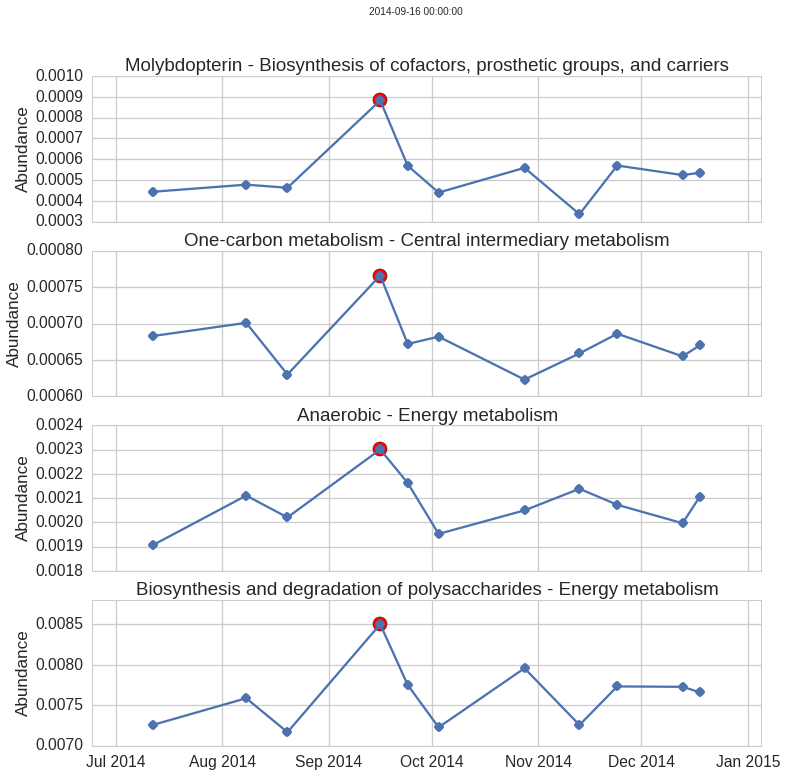

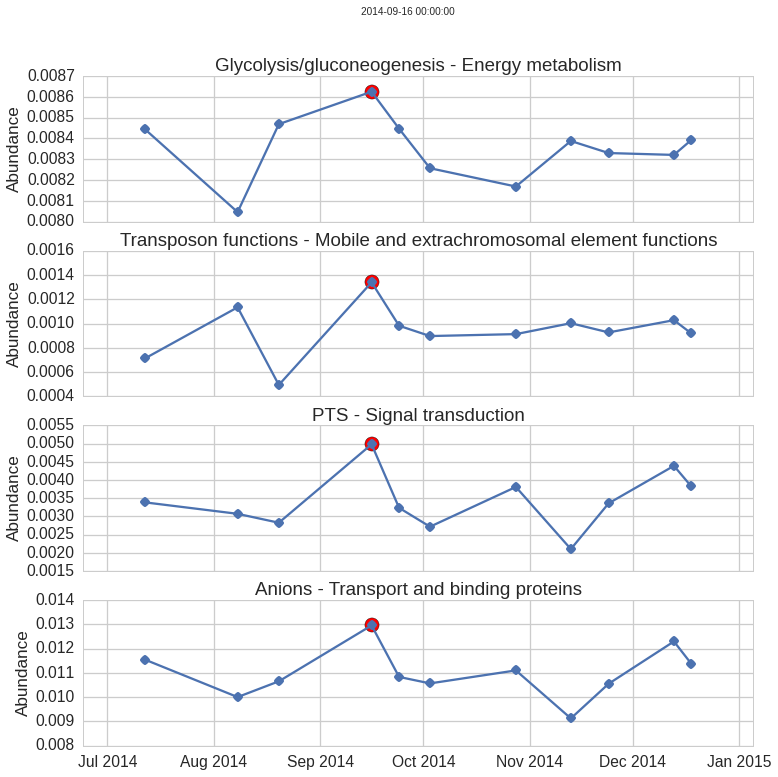

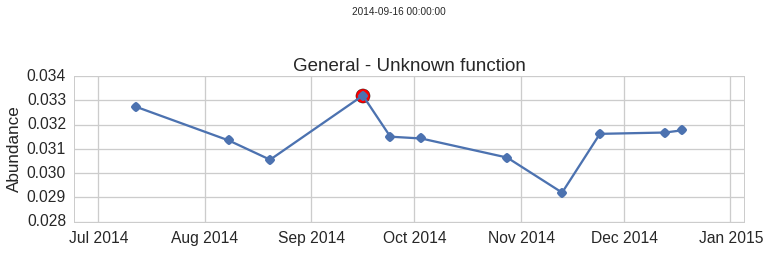

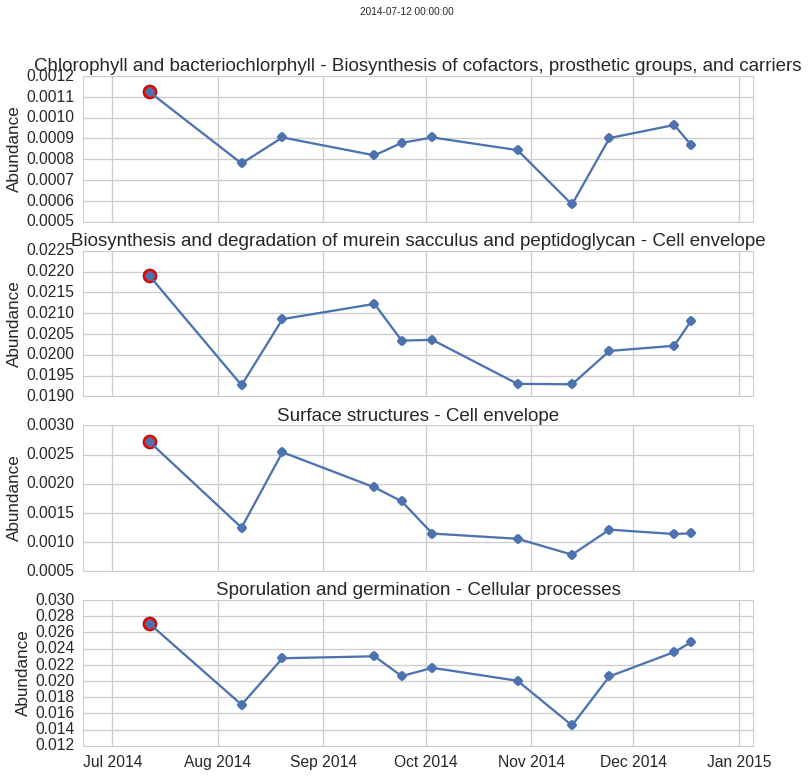

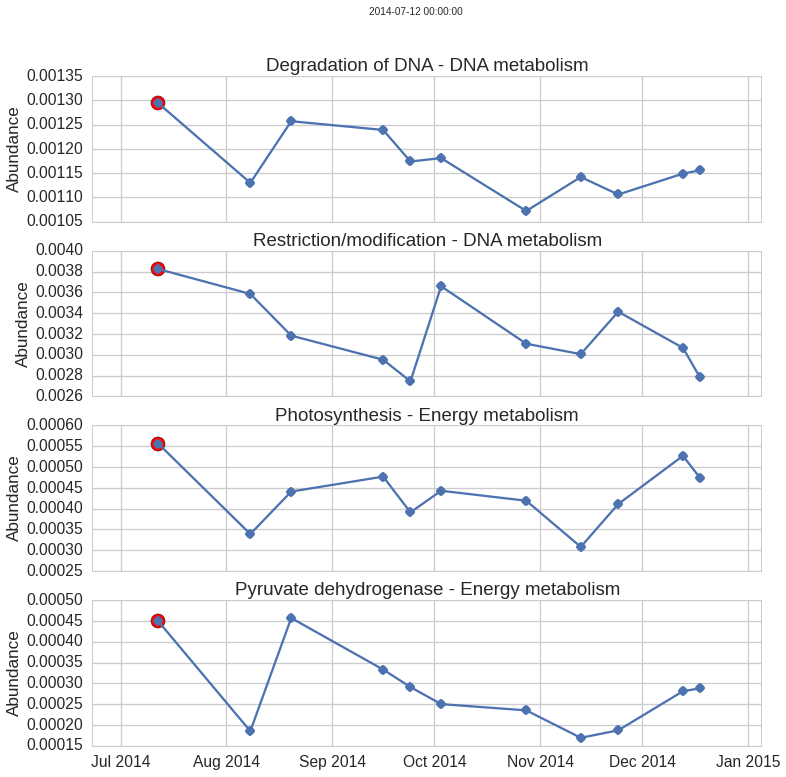

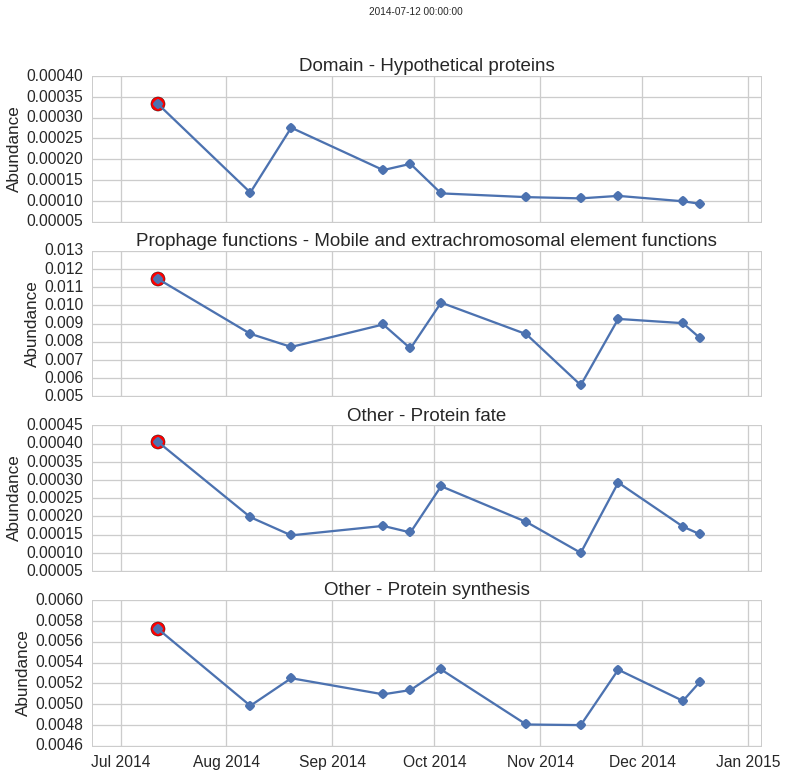

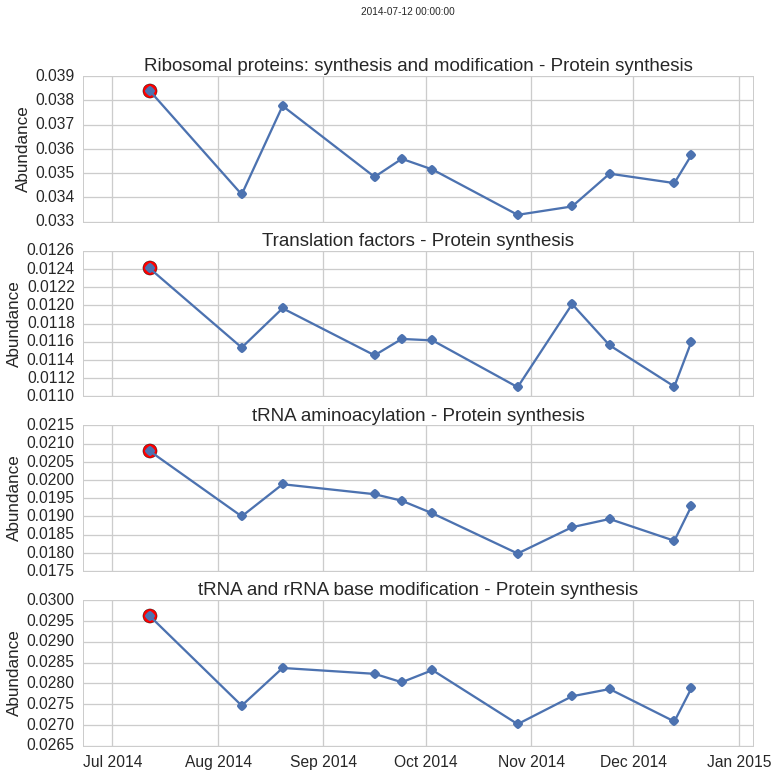

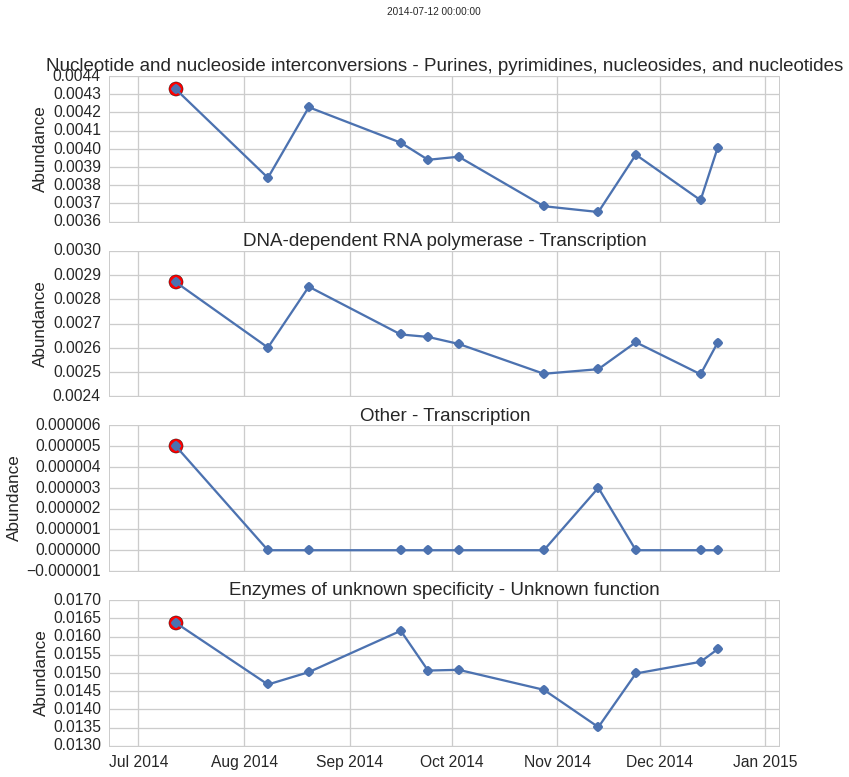

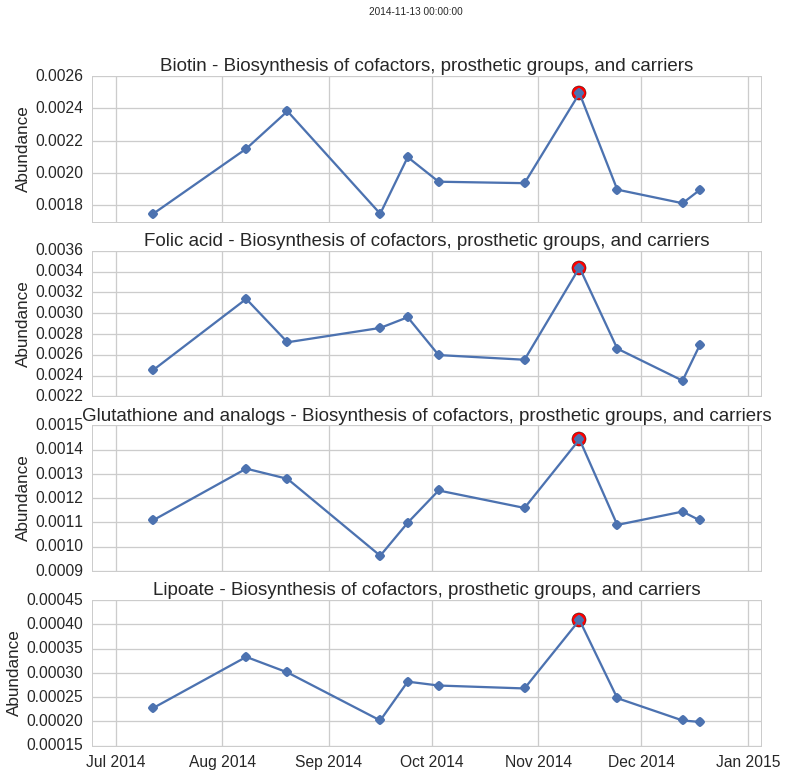

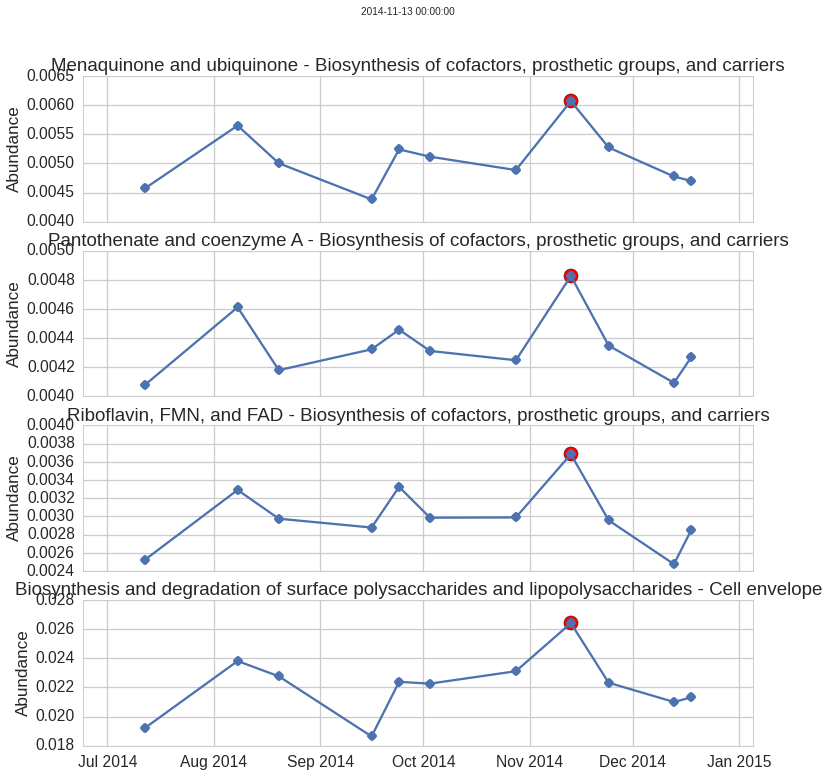

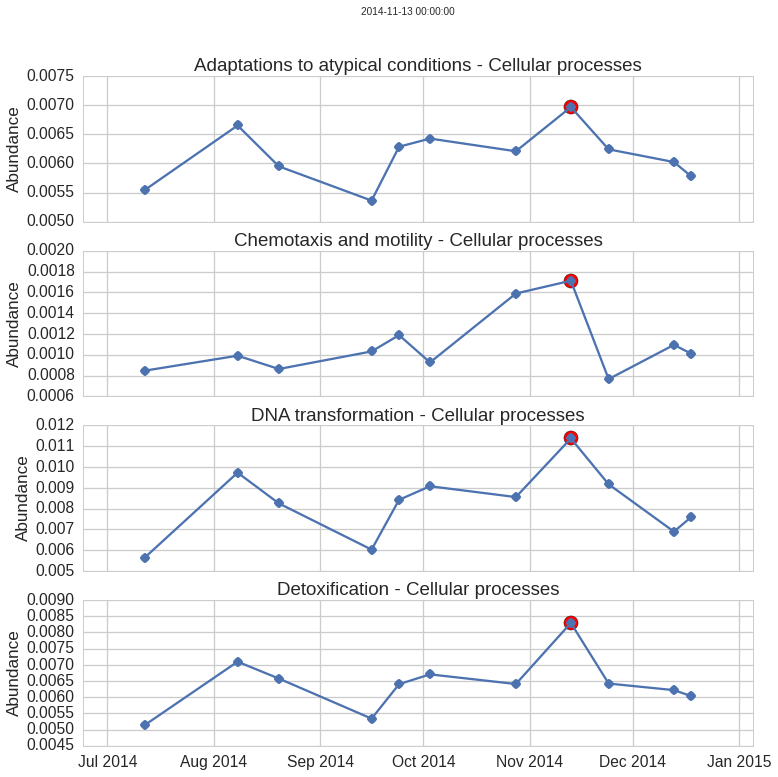

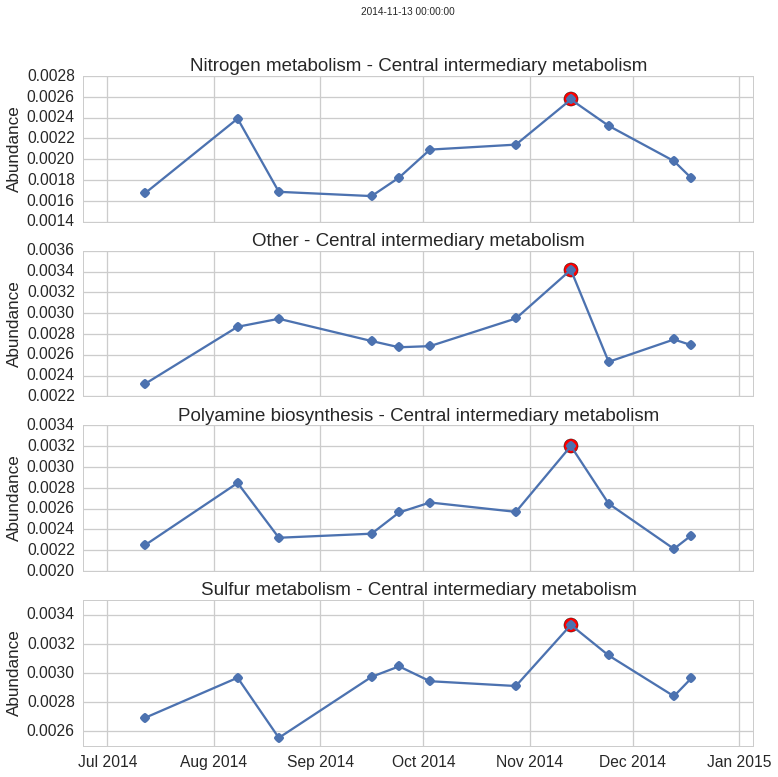

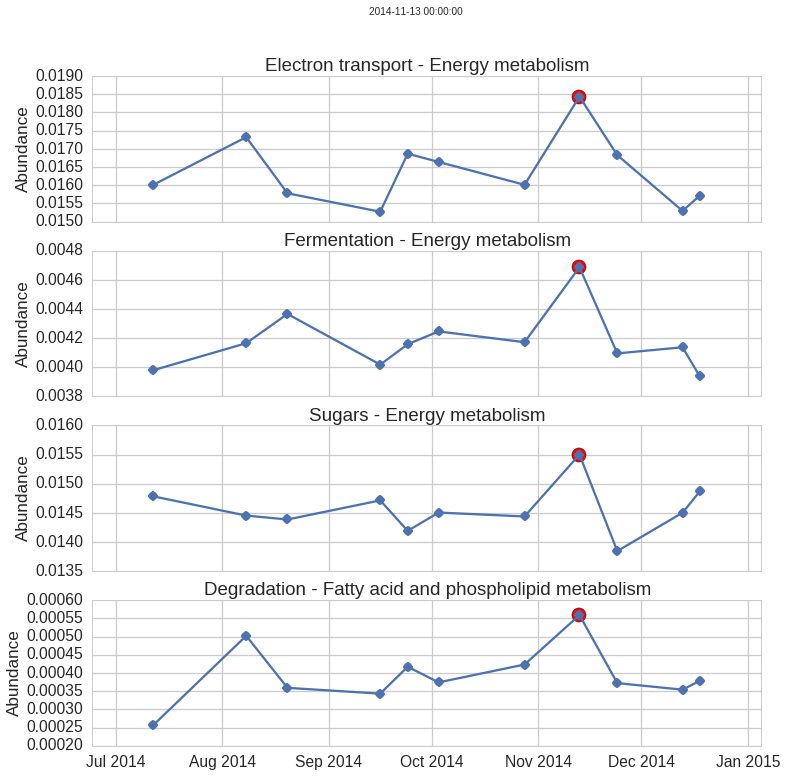

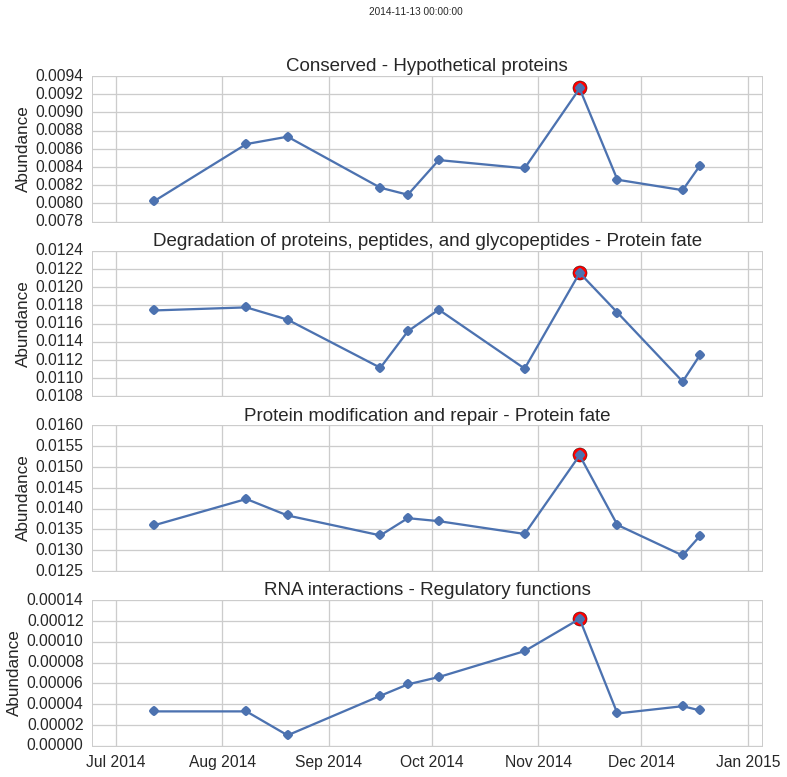

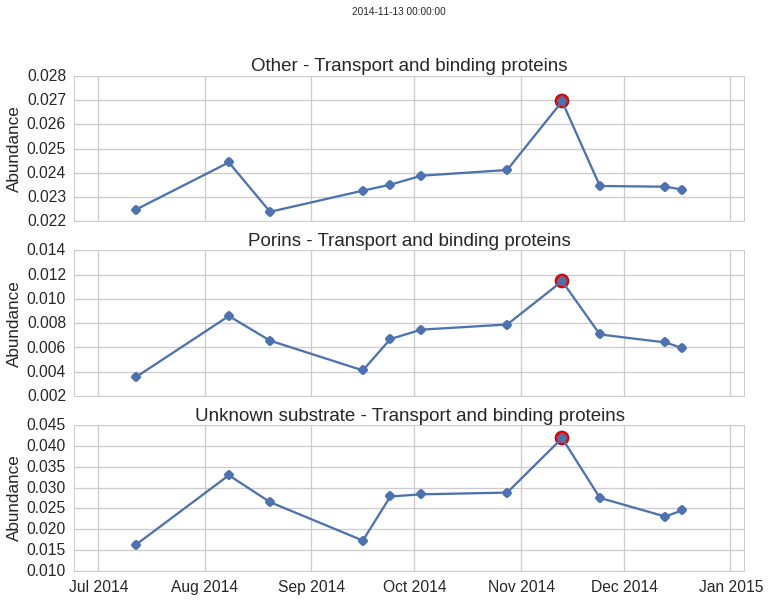

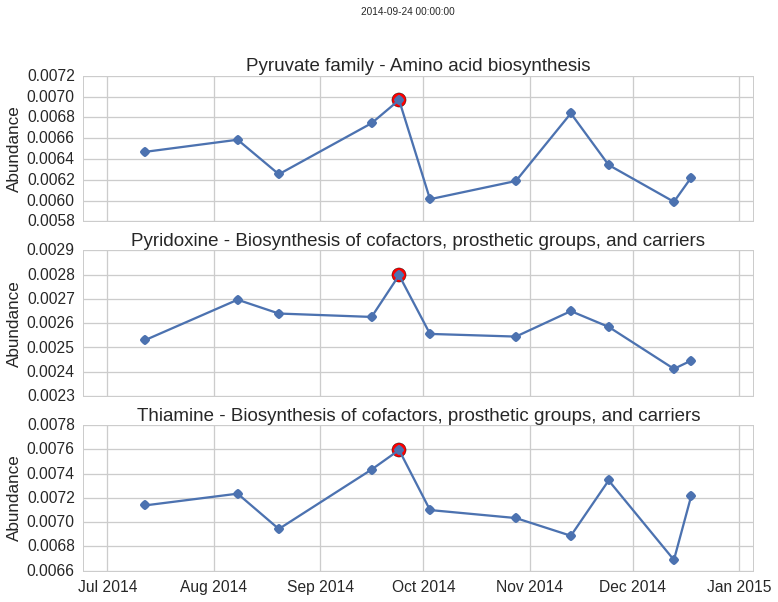

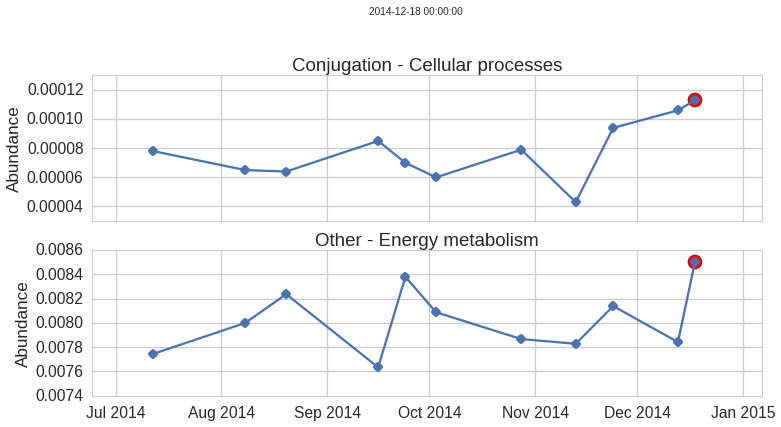

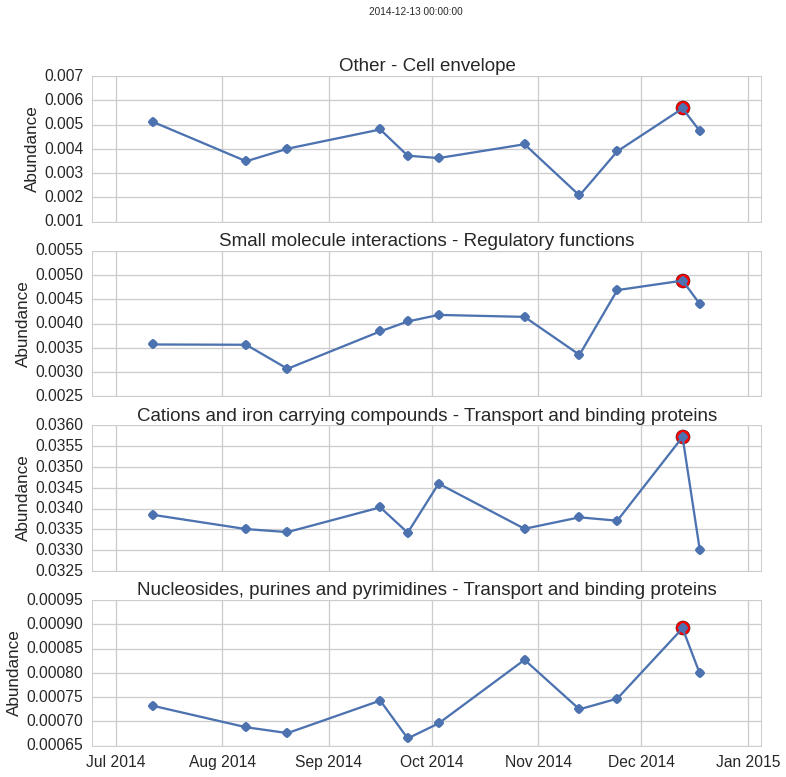

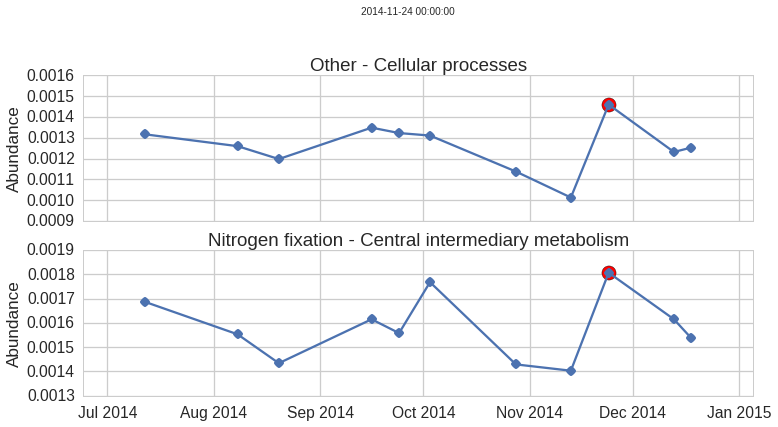

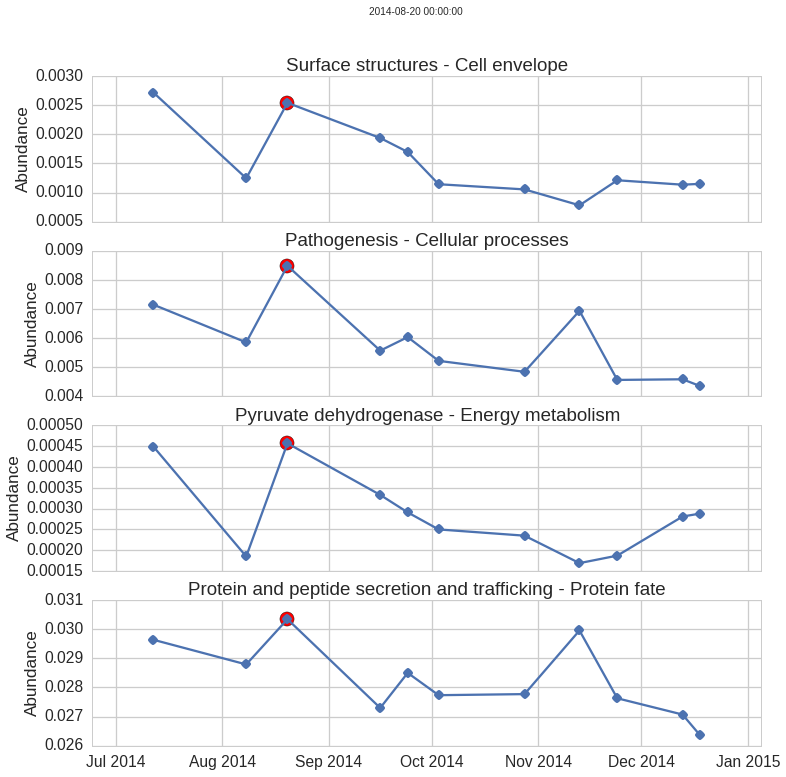

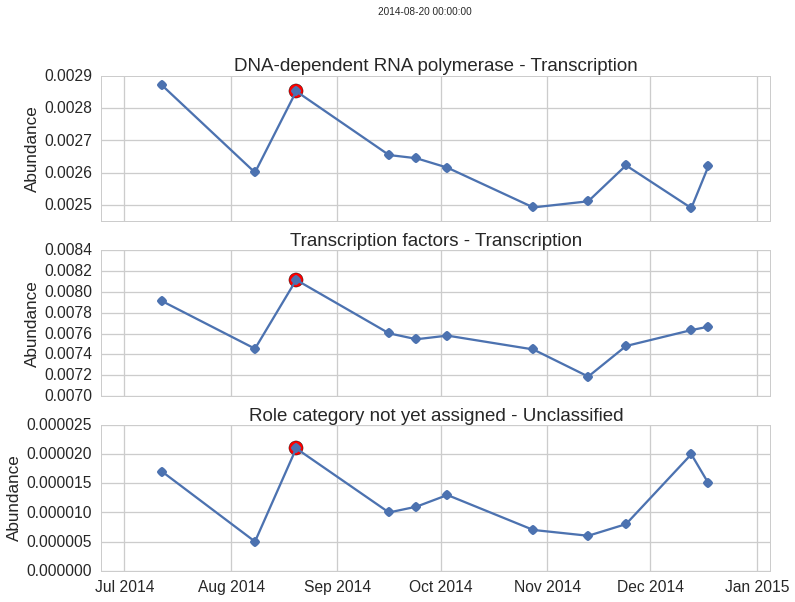

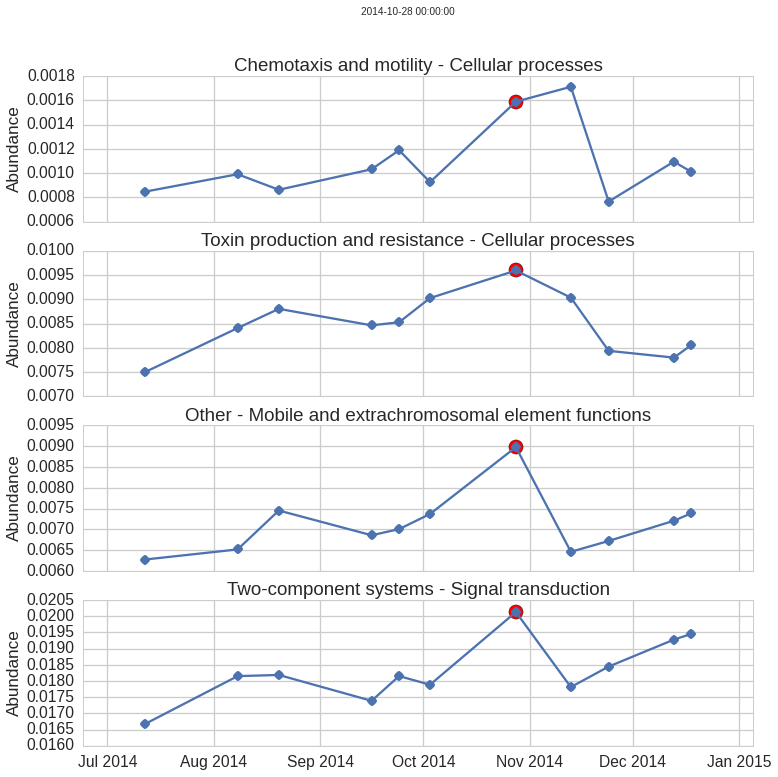

In [355]:
for sample, classification in outliers.iteritems():
    if len(classification) > 0:
        figs = vts.default(data_df[classification], main_title=sample, marksample=sample)

### Linear Trends

In [340]:
pvalues = ts.regress(data_df)

In [352]:
data_df[pvalues[pvalues < 1e-02].index]

Sub_role   Surface structures                Domain  \
Main_role       Cell envelope Hypothetical proteins   
2014-07-12           0.002717              0.000332   
2014-08-08           0.001245              0.000120   
2014-08-20           0.002541              0.000276   
2014-09-16           0.001937              0.000174   
2014-09-24           0.001697              0.000189   
2014-10-03           0.001143              0.000118   
2014-10-28           0.001054              0.000109   
2014-11-13           0.000781              0.000106   
2014-11-24           0.001211              0.000112   
2014-12-13           0.001135              0.000099   
2014-12-18           0.001149              0.000093   

Sub_role               Pyrimidine ribonucleotide biosynthesis  
Main_role  Purines, pyrimidines, nucleosides, and nucleotides  
2014-07-12                                           0.006059  
2014-08-08                                           0.005859  
2014-08-20                                           0.005871  
2014-09-16                                           0.005889  
2014-09-24                                           0.006034  
2014-10-03                                           0.005654  
2014-10-28                                           0.005326  
2014-11-13                                           0.005747  
2014-11-24                                           0.005673  
2014-12-13                                           0.005354  
2014-12-18                                           0.005610

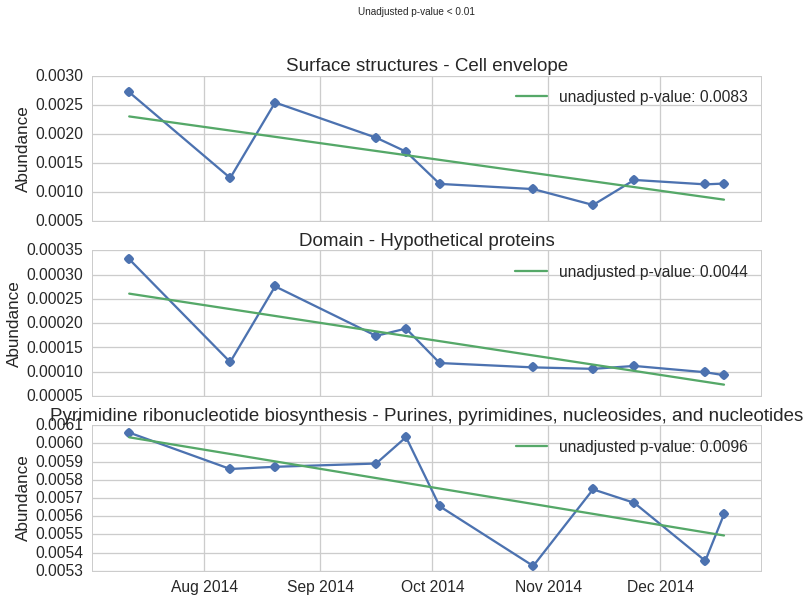

In [354]:
vts.default(data_df[pvalues[pvalues < 1e-02].index], 
            main_title='Unadjusted p-value < 0.01', bestfit=True)

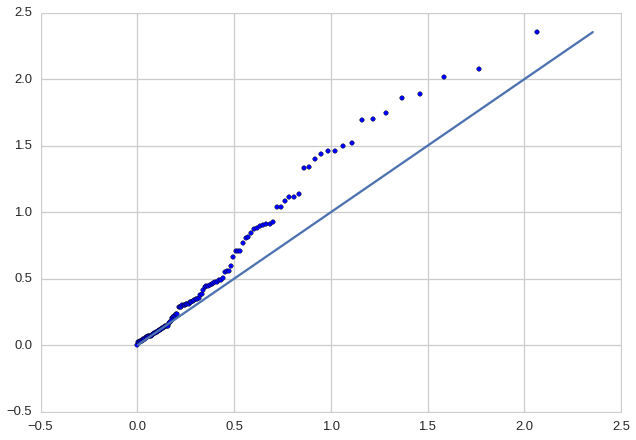

In [11]:
x, y = shelp.qqvalues(pvalues)
sns.set_context("talk")
scatter(x,y)
plot(y, y)

### Changepoint Analysis
:: using https://github.com/amanahuja/change-detection-tutorial

In [246]:
changepoints = ts.changepoints(data_df)

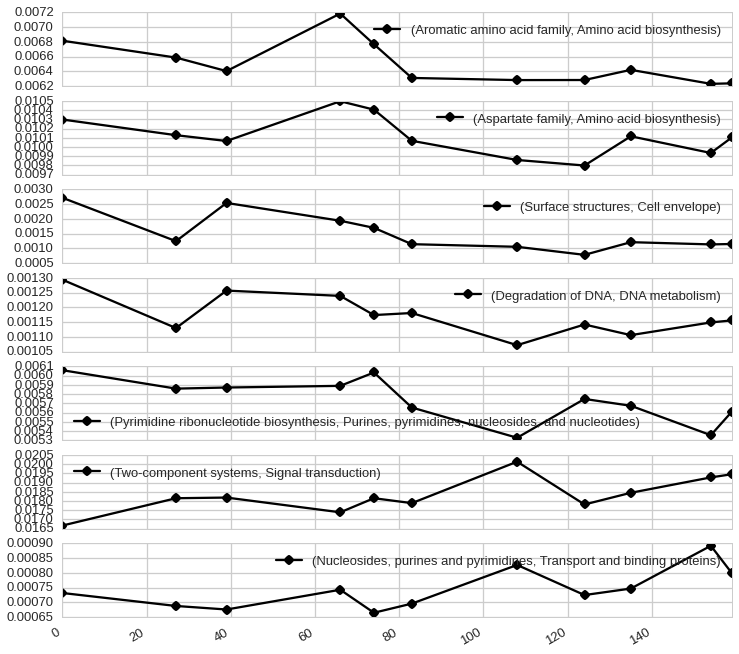

In [26]:
data_df[changepoints[changepoints > 0].index].plot(subplots=True, 
                                                   figsize=(12, 12),
                                                   marker='o');

In [253]:
data_df[changepoints.index]

Sub_role   Aromatic amino acid family        Aspartate family  \
Main_role     Amino acid biosynthesis Amino acid biosynthesis   
2014-07-12                   0.006816                0.010298   
2014-08-08                   0.006587                0.010128   
2014-08-20                   0.006404                0.010065   
2014-09-16                   0.007184                0.010496   
2014-09-24                   0.006768                0.010405   
2014-10-03                   0.006311                0.010067   
2014-10-28                   0.006282                0.009859   
2014-11-13                   0.006283                0.009799   
2014-11-24                   0.006421                0.010116   
2014-12-13                   0.006231                0.009935   
2014-12-18                   0.006238                0.010104   

Sub_role   Surface structures Degradation of DNA  \
Main_role       Cell envelope     DNA metabolism   
2014-07-12           0.002717           0.001294   
2014-08-08           0.001245           0.001130   
2014-08-20           0.002541           0.001257   
2014-09-16           0.001937           0.001239   
2014-09-24           0.001697           0.001174   
2014-10-03           0.001143           0.001181   
2014-10-28           0.001054           0.001072   
2014-11-13           0.000781           0.001142   
2014-11-24           0.001211           0.001106   
2014-12-13           0.001135           0.001149   
2014-12-18           0.001149           0.001156   

Sub_role               Pyrimidine ribonucleotide biosynthesis  \
Main_role  Purines, pyrimidines, nucleosides, and nucleotides   
2014-07-12                                           0.006059   
2014-08-08                                           0.005859   
2014-08-20                                           0.005871   
2014-09-16                                           0.005889   
2014-09-24                                           0.006034   
2014-10-03                                           0.005654   
2014-10-28                                           0.005326   
2014-11-13                                           0.005747   
2014-11-24                                           0.005673   
2014-12-13                                           0.005354   
2014-12-18                                           0.005610   

Sub_role   Two-component systems Nucleosides, purines and pyrimidines  
Main_role    Signal transduction       Transport and binding proteins  
2014-07-12              0.016668                             0.000732  
2014-08-08              0.018151                             0.000688  
2014-08-20              0.018187                             0.000676  
2014-09-16              0.017387                             0.000743  
2014-09-24              0.018152                             0.000665  
2014-10-03              0.017885                             0.000696  
2014-10-28              0.020132                             0.000827  
2014-11-13              0.017812                             0.000725  
2014-11-24              0.018446                             0.000747  
2014-12-13              0.019280                             0.000892  
2014-12-18              0.019453                             0.000799

In [262]:
changepoints.values

array([5, 5, 5, 6, 5, 6, 6], dtype=object)

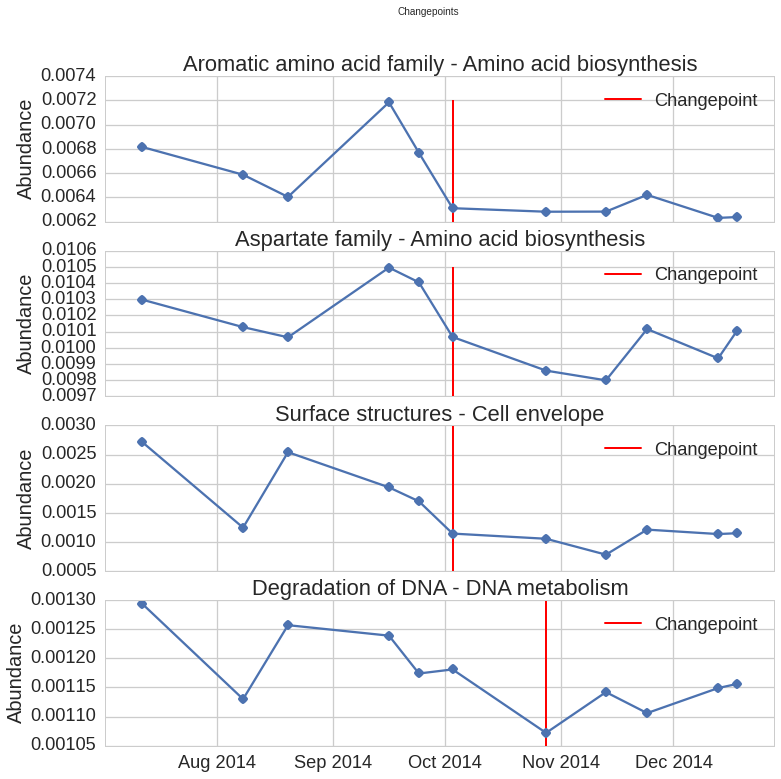

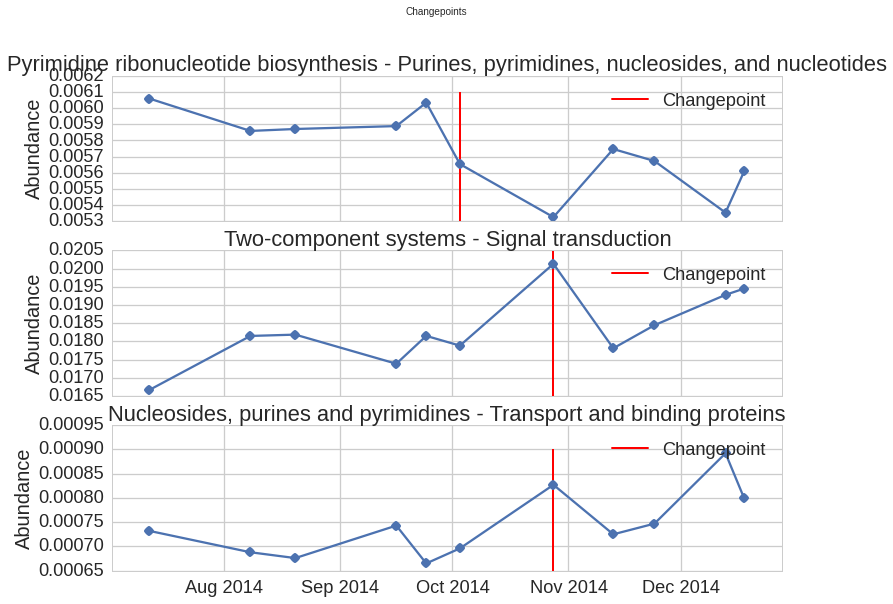

In [296]:
changepoints = changepoints[changepoints > 0]
figs = vts.default(data_df[changepoints.index], main_title='Changepoints',
                   changepoints=changepoints.values)

### Autocorrelation - see if there are cyclic patterns; unfortunately unevenly spaced points. We could do spectral, but hunch is that there are not enough data points.